In [4]:
import pandas as pd

df = pd.read_csv('F:\\data2.csv')
df.head()

,X,Y,LABEL
0,96,89,1
1,85,39,1
2,40,64,0
3,35,91,0
4,71,49,1


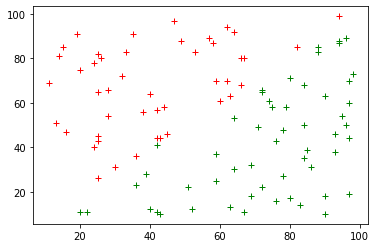

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display
from scipy.signal import savgol_filter

X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "g+")

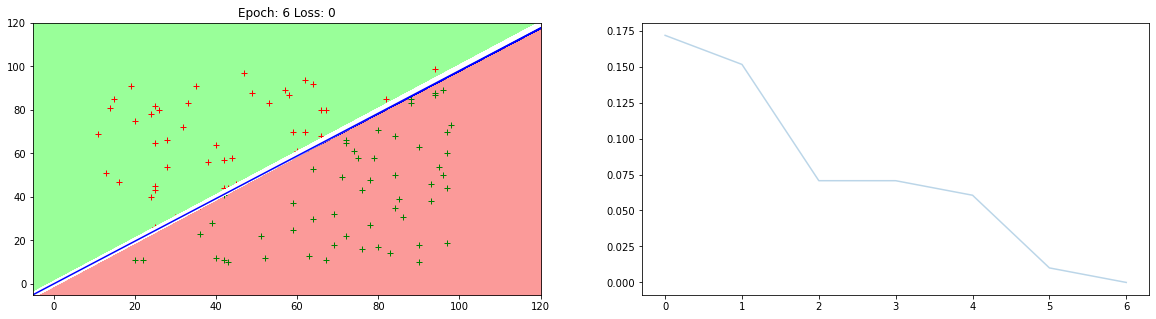

Epoch: 6 Loss: 0.0


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display
from scipy.signal import savgol_filter


W = [random.random(), random.random()]
b = random.random()

lr = 0.1
theta=0.5

epoch = 0
count = 0


loss = []

while count < len(X1):
    
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error =  Y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error
        else:
            count += 1
    
    loss.append(1/len(X1)*total_error)
    
    plt.figure(figsize=(20,5))  
    display.clear_output(wait=True)
    plt.subplot(1,2,1)

    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "r+")
        else:
            plt.plot(X1[i], X2[i], "g+")

        plt.xlim(-5,120)
        plt.ylim(-5,120)
        xint=(theta-b)/W[0]
        yint=(theta-b)/W[1]
        slope=-yint/xint
        x=plt.xlim()
        y=[]
        for i in x:
            y.append(slope*i+yint)
        plt.plot(x,y, 'w-',linewidth=5)
        plt.fill_between(x=[-5,120],y1=-5,y2=120, color='#99FF99',alpha=.01)
        plt.fill_between(x=[-5,120],y1=-5,y2=y, color='#FF9999',alpha=.4)
       

        slope = -yintr/xintr
        xx = plt.xlim()
        yeq = []
        for x in xx:
            yeq.append(slope*x+yintr)
        plt.plot(xx,yeq, 'b-')

    plt.title(f"Epoch: {epoch} Loss: {total_error}")

    plt.subplot(1,2,2)
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3) 
        plt.plot(yhat, 'r--', lw=3)

    plt.show()
            
    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch += 1